In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = np.genfromtxt('/kaggle/input/digit-recognizer/test.csv', delimiter=',', skip_header=1)
sample_submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [6]:
print('Train data shape: ', train_data.shape)
print('Test data shape: ', test_data.shape)
print('Sample data shape: ', sample_submission.shape)

Train data shape:  (42000, 785)
Test data shape:  (28000, 784)
Sample data shape:  (28000, 2)


In [11]:
# check information about train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [14]:
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [19]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
train_data.isnull().sum().describe()

count    785.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [12]:
# check information about test dataset
test_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
# check information about sample dataset
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ImageId  28000 non-null  int64
 1   Label    28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB


In [23]:
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [25]:
sample_submission.isnull()

,ImageId,Label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
27995,False,False
27996,False,False
27997,False,False
27998,False,False


Text(0.5, 1.0, 'Dataset Distribution')

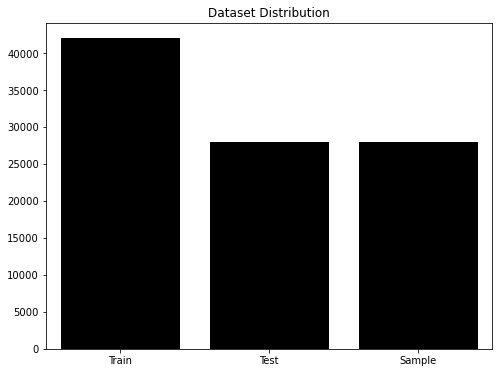

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the dataset distribution
plt.figure(figsize=(8,6))
sns.barplot(['Train', 'Test','Sample'],[train_data.shape[0],test_data.shape[0],sample_submission.shape[0]], color='black')
plt.title('Dataset Distribution')

Text(0.5, 1.0, 'Label Distribution for Train Data')

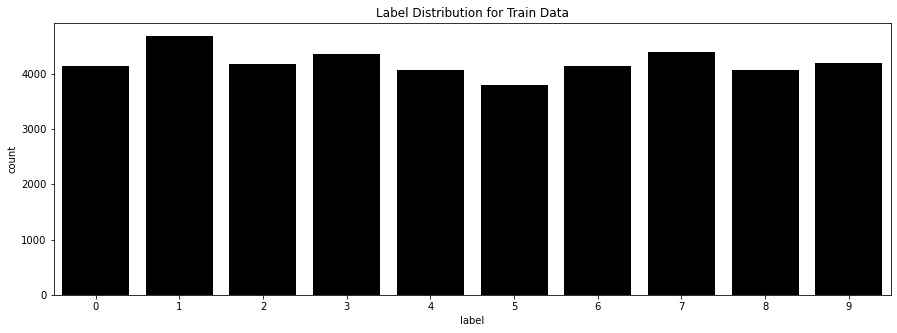

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(train_data['label'],color='black')
plt.title('Label Distribution for Train Data')

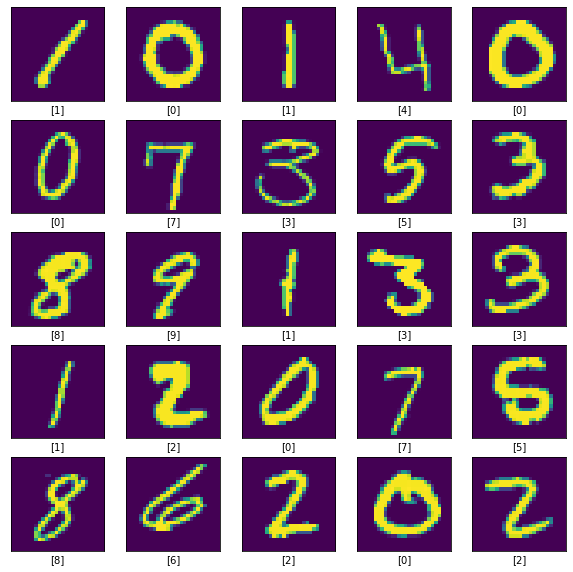

In [34]:
# Let's check images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data.iloc[i,1:].to_numpy().reshape((28,28)))
    plt.xlabel([train_data.iloc[i,0]])
plt.show()

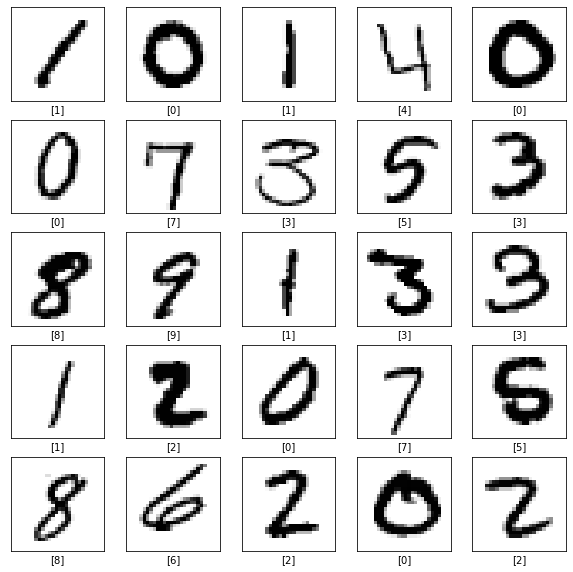

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data.iloc[i,1:].to_numpy().reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel([train_data.iloc[i,0]])
plt.show()

In [36]:
import time
import scipy
from PIL import Image

from scipy import ndimage

import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
# set parameters
seed = 42
np.random.seed(seed)

In [42]:
# define variables
X = train_data.drop("label",axis=1).values.astype("float32")
y = train_data["label"].values.astype("int32")

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)

In [44]:
#reshape
X_train = X_train / 255.0
X_test = X_test / 255.0

In [45]:
y_train = keras.utils.to_categorical(y_train, 10)

y_test = keras.utils.to_categorical(y_test, 10)

In [47]:
#define first model
model_base = Sequential()
model_base.add(Dense(64, activation='relu',input_dim=784))
model_base.add(Dropout(0.1))
model_base.add(Dense(64, activation='relu'))
model_base.add(Dropout(0.1))
model_base.add(Dense(64, activation='relu'))
model_base.add(Dropout(0.1))
model_base.add(Dense(10,activation ='softmax'))

In [48]:
model_base.compile(optimizer='rmsprop',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [49]:
model_base.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [51]:
early_stopping = EarlyStopping()
history_base = model_base.fit(X_train, y_train, epochs=25, batch_size =64, validation_data=(X_test,y_test),callbacks=[early_stopping]);

Epoch 1/25
525/525 [==============================] - 2s 3ms/step - loss: 0.5051 - accuracy: 0.8475 - val_loss: 0.2244 - val_accuracy: 0.9323
Epoch 2/25
525/525 [==============================] - 1s 2ms/step - loss: 0.2400 - accuracy: 0.9280 - val_loss: 0.1706 - val_accuracy: 0.9501
Epoch 3/25
525/525 [==============================] - 1s 3ms/step - loss: 0.1804 - accuracy: 0.9468 - val_loss: 0.1513 - val_accuracy: 0.9555
Epoch 4/25
525/525 [==============================] - 1s 3ms/step - loss: 0.1537 - accuracy: 0.9551 - val_loss: 0.1284 - val_accuracy: 0.9624
Epoch 5/25
525/525 [==============================] - 1s 3ms/step - loss: 0.1354 - accuracy: 0.9604 - val_loss: 0.1237 - val_accuracy: 0.9637
Epoch 6/25
525/525 [==============================] - 1s 2ms/step - loss: 0.1225 - accuracy: 0.9649 - val_loss: 0.1204 - val_accuracy: 0.9655
Epoch 7/25
525/525 [==============================] - 1s 3ms/step - loss: 0.1096 - accuracy: 0.9685 - val_loss: 0.1154 - val_accuracy: 0.9644
Epoch 

In [52]:
y_pred = model_base.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.99      0.99       909
           2       0.98      0.95      0.97       846
           3       0.95      0.96      0.96       937
           4       0.98      0.95      0.97       839
           5       0.96      0.95      0.96       702
           6       0.97      0.97      0.97       785
           7       0.94      0.98      0.96       893
           8       0.93      0.96      0.95       835
           9       0.97      0.94      0.96       838

    accuracy                           0.96      8400
   macro avg       0.97      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



TypeError: zip argument #2 must support iteration

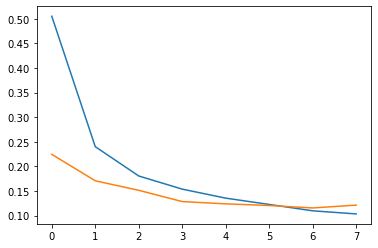

In [57]:
plt.plot(history_base.history['loss'], label = 'loss')
plt.plot(history_base.history['val_loss'], label = 'val_loss')
plt.legend(['loss','val_loss'])